In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create an empty graph
G = nx.Graph()

# Read the edges from the file and add them to the graph
with open("yeast.txt", "r") as file:
    for line in file:
        if not line.startswith("%"):  # Ignore comment lines
            source, target = map(int, line.strip().split())
            G.add_edge(source, target)

# Number of nodes
num_nodes = G.number_of_nodes()

# Number of edges
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)


Number of nodes: 1870
Number of edges: 2277


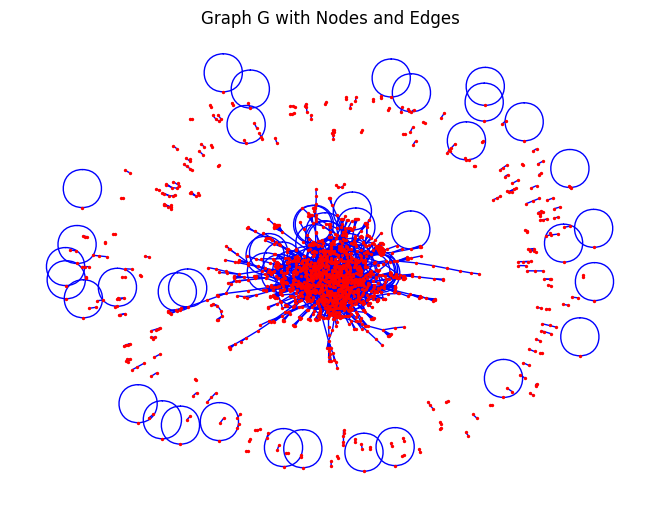

In [25]:

# Create a layout for the graph
pos = nx.spring_layout(G)

# Draw the nodes and edges without labels
nx.draw(G, pos=None, node_size=2, node_color='r',edge_color='b')
# Show the plot
plt.title('Graph G with Nodes and Edges')
plt.show()

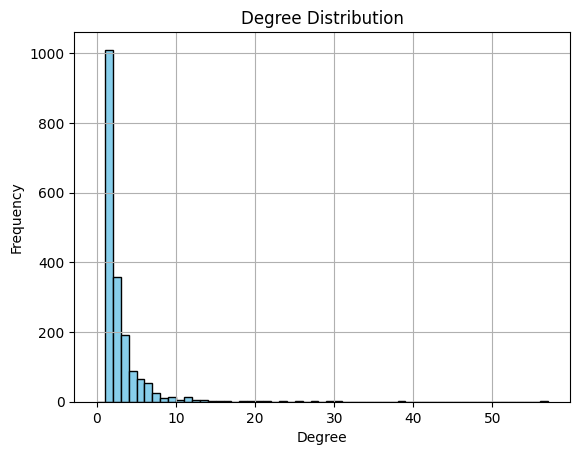

In [26]:
# Get the degree of each node
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Plot the degree distribution
plt.hist(degree_sequence, bins=range(max(degree_sequence) + 2), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.grid(True)
plt.show()

In [27]:
# Calculate degrees of all nodes
degrees = dict(G.degree())

# Sort nodes by degree in descending order 
top_10_nodes = sorted(degrees, key=degrees.get, reverse=True)[:10]

# Create a DataFrame
df = pd.DataFrame({
    'Node': top_10_nodes,
    'Degree': [degrees[node] for node in top_10_nodes]
})

print(df)

   Node  Degree
0   181      56
1    26      38
2    58      30
3    78      29
4    60      29
5   124      27
6    16      25
7   270      23
8    19      21
9    79      21


In [4]:
# Get the degree of each node
degrees = [d for n, d in G.degree()]

# Calculate maximum degree
max_degree = max(degrees)

# Calculate minimum degree
min_degree = min(degrees)

# Calculate average degree
avg_degree = sum(degrees) / len(degrees)

# Calculate standard deviation of the degree distribution
std_dev_degree = np.std(degrees)

print("Maximum Degree:", max_degree)
print("Minimum Degree:", min_degree)
print("Average Degree:", avg_degree)
print("Standard Deviation of Degree Distribution:", std_dev_degree)

Maximum Degree: 248
Minimum Degree: 1
Average Degree: 11.244963503649634
Standard Deviation of Degree Distribution: 24.45819001020538


In [5]:
# Calculate average local clustering coefficient
avg_local_clustering_coefficient = nx.average_clustering(G)

# Calculate global clustering coefficient
global_clustering_coefficient = nx.transitivity(G)

# Calculate transitivity
transitivity = nx.transitivity(G)
print("transitivity",transitivity)

# Calculate reciprocity
reciprocity_value = nx.reciprocity(G)
print("Reciprocity:", reciprocity_value)


print("avg_local_clustering_coefficient",avg_local_clustering_coefficient)
print("global_clustering_coefficient",global_clustering_coefficient)



transitivity 0.24830297528765316
Reciprocity: 0.0
avg_local_clustering_coefficient 0.4870933566129556
global_clustering_coefficient 0.24830297528765316


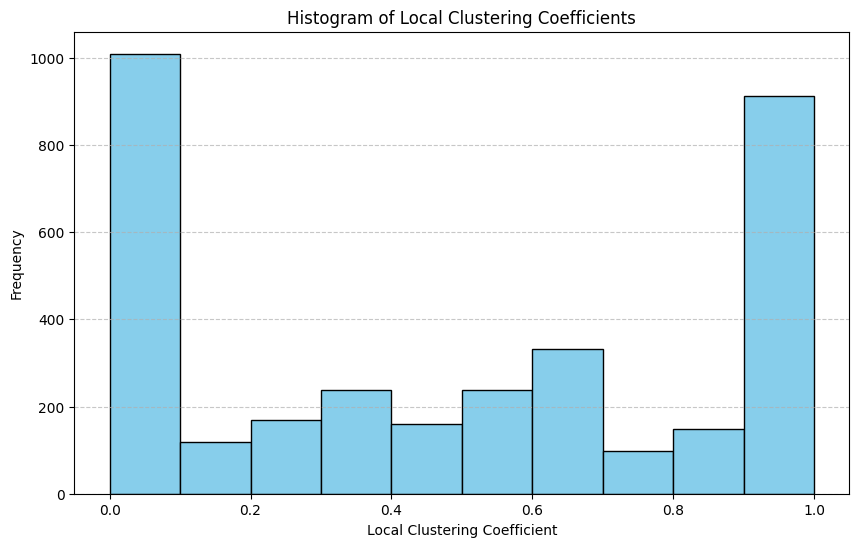

In [6]:
# Calculate local clustering coefficients for each node

local_clustering_coefficients = nx.clustering(G)
# Create DataFrame to store nodes and their local clustering coefficients
local_clustering_df = pd.DataFrame({
    'Node': list(local_clustering_coefficients.keys()),
    'Local Clustering Coefficient': list(local_clustering_coefficients.values())
})

# Sort the DataFrame by node for plotting
local_clustering_df = local_clustering_df.sort_values(by='Node')
# Plot
plt.figure(figsize=(10, 6))
plt.hist(local_clustering_df['Local Clustering Coefficient'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of Local Clustering Coefficients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

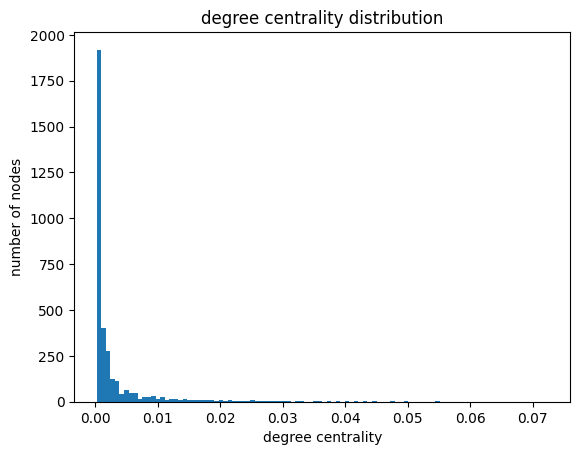

In [7]:
degree_centrality = nx.degree_centrality(G)
plt.hist(list(degree_centrality.values()),bins= 100)
plt.title("degree centrality distribution")
plt.xlabel("degree centrality")
plt.ylabel("number of nodes")
plt.show()
centrality_df = pd.DataFrame({'Degree Centrality': degree_centrality,})


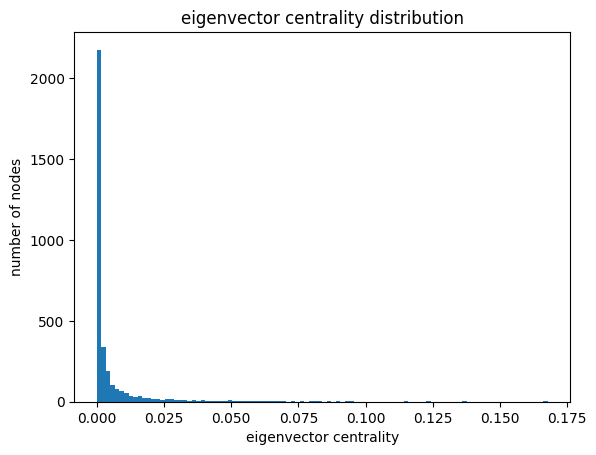

In [8]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-6)
plt.hist(list(eigenvector_centrality.values()),bins= 100)
plt.title("eigenvector centrality distribution")
plt.xlabel("eigenvector centrality")
plt.ylabel("number of nodes")
plt.show()

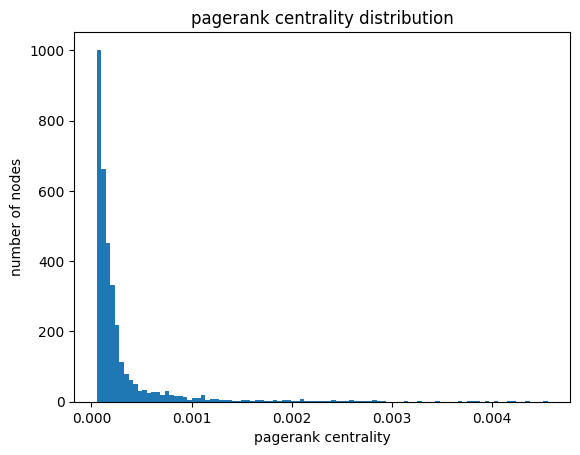

In [9]:
pagerank_centrality = nx.pagerank(G)
plt.hist(list(pagerank_centrality.values()),bins= 100)
plt.title("pagerank centrality distribution")
plt.xlabel("pagerank centrality")
plt.ylabel("number of nodes")
plt.show()

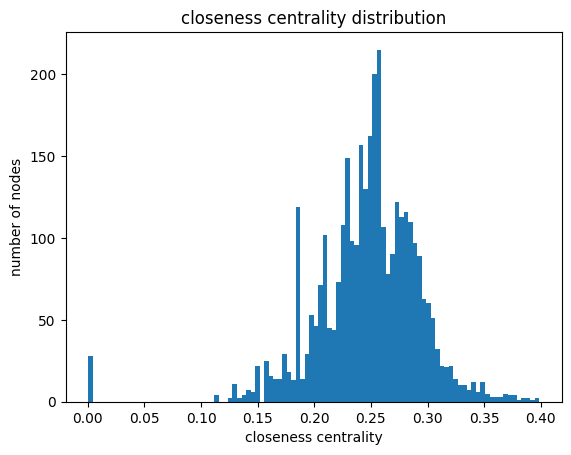

In [10]:
try: 
    closeness_centrality = nx.closeness_centrality(G)
    plt.hist(list(closeness_centrality.values()),bins= 100)
    plt.title("closeness centrality distribution")
    plt.xlabel("closeness centrality")
    plt.ylabel("number of nodes")
    plt.show()
except nx.NetworkXError as e:
    print("closeness_centrality calculation failed:", e)


In [23]:
try: 
    katz_centrality = nx.katz_centrality(G, max_iter=100, alpha=0.3, beta=0.01)
    plt.hist(list(katz_centrality.values()),bins= 100)
    plt.title("katz_centrality distribution")
    plt.xlabel("katz_centrality")
    plt.ylabel("number of nodes")
    plt.show()
except nx.NetworkXError as e:
    print("katz_centrality calculation failed:", e)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

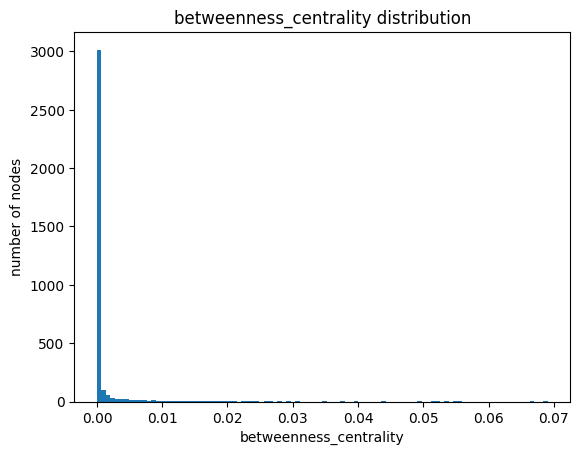

In [14]:
try: 
    betweenness_centrality = nx.betweenness_centrality(G, k=1000)
    plt.hist(list(betweenness_centrality.values()),bins= 100)
    plt.title("betweenness_centrality distribution")
    plt.xlabel("betweenness_centrality")
    plt.ylabel("number of nodes")
    plt.show()
except nx.NetworkXError as e:
    print("betweenness_centrality calculation failed:", e)

In [15]:
degree_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality'])
betweenness_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['Betweenness Centrality'])
closeness_df = pd.DataFrame.from_dict(closeness_centrality, orient='index', columns=['Closeness Centrality'])
eigenvector_df = pd.DataFrame.from_dict(eigenvector_centrality, orient='index', columns=['Eigenvector Centrality'])

# Sort DataFrames by centrality values
degree_df = degree_df.sort_values(by='Degree Centrality', ascending=False)
betweenness_df = betweenness_df.sort_values(by='Betweenness Centrality', ascending=False)
closeness_df = closeness_df.sort_values(by='Closeness Centrality', ascending=False)
eigenvector_df = eigenvector_df.sort_values(by='Eigenvector Centrality', ascending=False)

# Get top 10 nodes for each centrality measure
top_10_degree = degree_df.head(10)
top_10_betweenness = betweenness_df.head(10)
top_10_closeness = closeness_df.head(10)
top_10_eigenvector = eigenvector_df.head(10)


In [16]:
print("Top 10 Nodes by Degree Centrality:")
print(top_10_degree)
print("\nTop 10 Nodes by Betweenness Centrality:")
print(top_10_betweenness)

Top 10 Nodes by Degree Centrality:
     Degree Centrality
228           0.072430
503           0.071262
450           0.070093
798           0.068925
203           0.063376
291           0.060456
127           0.060164
194           0.056075
7             0.055491
168           0.054907

Top 10 Nodes by Betweenness Centrality:
      Betweenness Centrality
718                 0.069085
346                 0.066455
450                 0.055354
168                 0.055019
228                 0.053384
127                 0.051908
503                 0.051319
291                 0.051214
1192                0.049222
798                 0.044193


In [17]:
print("\nTop 10 Nodes by Closeness Centrality:")
print(top_10_closeness)
print("\nTop 10 Nodes by Eigenvector Centrality:")
print(top_10_eigenvector)


Top 10 Nodes by Closeness Centrality:
      Closeness Centrality
503               0.398560
450               0.396122
468               0.394083
228               0.389841
168               0.389481
346               0.385646
376               0.383581
1063              0.379134
798               0.377097
127               0.376507

Top 10 Nodes by Eigenvector Centrality:
     Eigenvector Centrality
228                0.167851
503                0.166392
450                0.159451
194                0.148513
458                0.136330
468                0.136138
798                0.129329
138                0.128109
51                 0.125994
496                0.122953
